In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
url = 'https://gasprices.aaa.com/state-gas-price-averages/'
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

page = urlopen(req).read()
soup = BeautifulSoup(page, 'lxml')
table = soup.find_all('table')

df = pd.read_html(str(table))[0]

In [3]:
def remove_dollar(sign):
    try:
        sign = sign.str.replace('$','', regex=True)
    except:
        pass
    return sign

df = df.apply(remove_dollar)

display(df)

,State,Regular,Mid-Grade,Premium,Diesel
0,Alaska,3.284,3.431,3.595,3.075
1,Alabama,2.853,3.168,3.497,3.003
2,Arkansas,2.766,3.058,3.349,3.014
3,Arizona,3.145,3.420,3.671,3.163
4,California,4.128,4.315,4.435,4.136
5,Colorado,3.072,3.392,3.678,3.195
6,Connecticut,3.065,3.349,3.570,3.225
7,District of Columbia,3.145,3.630,3.778,3.282
8,Delaware,2.980,3.371,3.613,3.227
9,Florida,2.893,3.238,3.543,3.014


In [4]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

df.set_index('State', inplace=True)
df['Abbreviation'] = df.index.map(code)

In [5]:
order = list(df.columns)
order = [order[-1]] + order[:-1]
df = df[order]

df[['Regular', 'Mid-Grade', 'Premium', 'Diesel']] = df[['Regular', 'Mid-Grade', 'Premium', 'Diesel']].astype(float)
df[['Regular', 'Mid-Grade', 'Premium', 'Diesel']] = df[['Regular', 'Mid-Grade', 'Premium', 'Diesel']].round(decimals=2)

display(df)

,Abbreviation,Regular,Mid-Grade,Premium,Diesel
State,,,,,
Alaska,AK,3.28,3.43,3.60,3.08
Alabama,AL,2.85,3.17,3.50,3.00
Arkansas,AR,2.77,3.06,3.35,3.01
Arizona,AZ,3.14,3.42,3.67,3.16
California,CA,4.13,4.32,4.43,4.14
Colorado,CO,3.07,3.39,3.68,3.20
Connecticut,CT,3.06,3.35,3.57,3.22
District of Columbia,DC,3.14,3.63,3.78,3.28
Delaware,DE,2.98,3.37,3.61,3.23


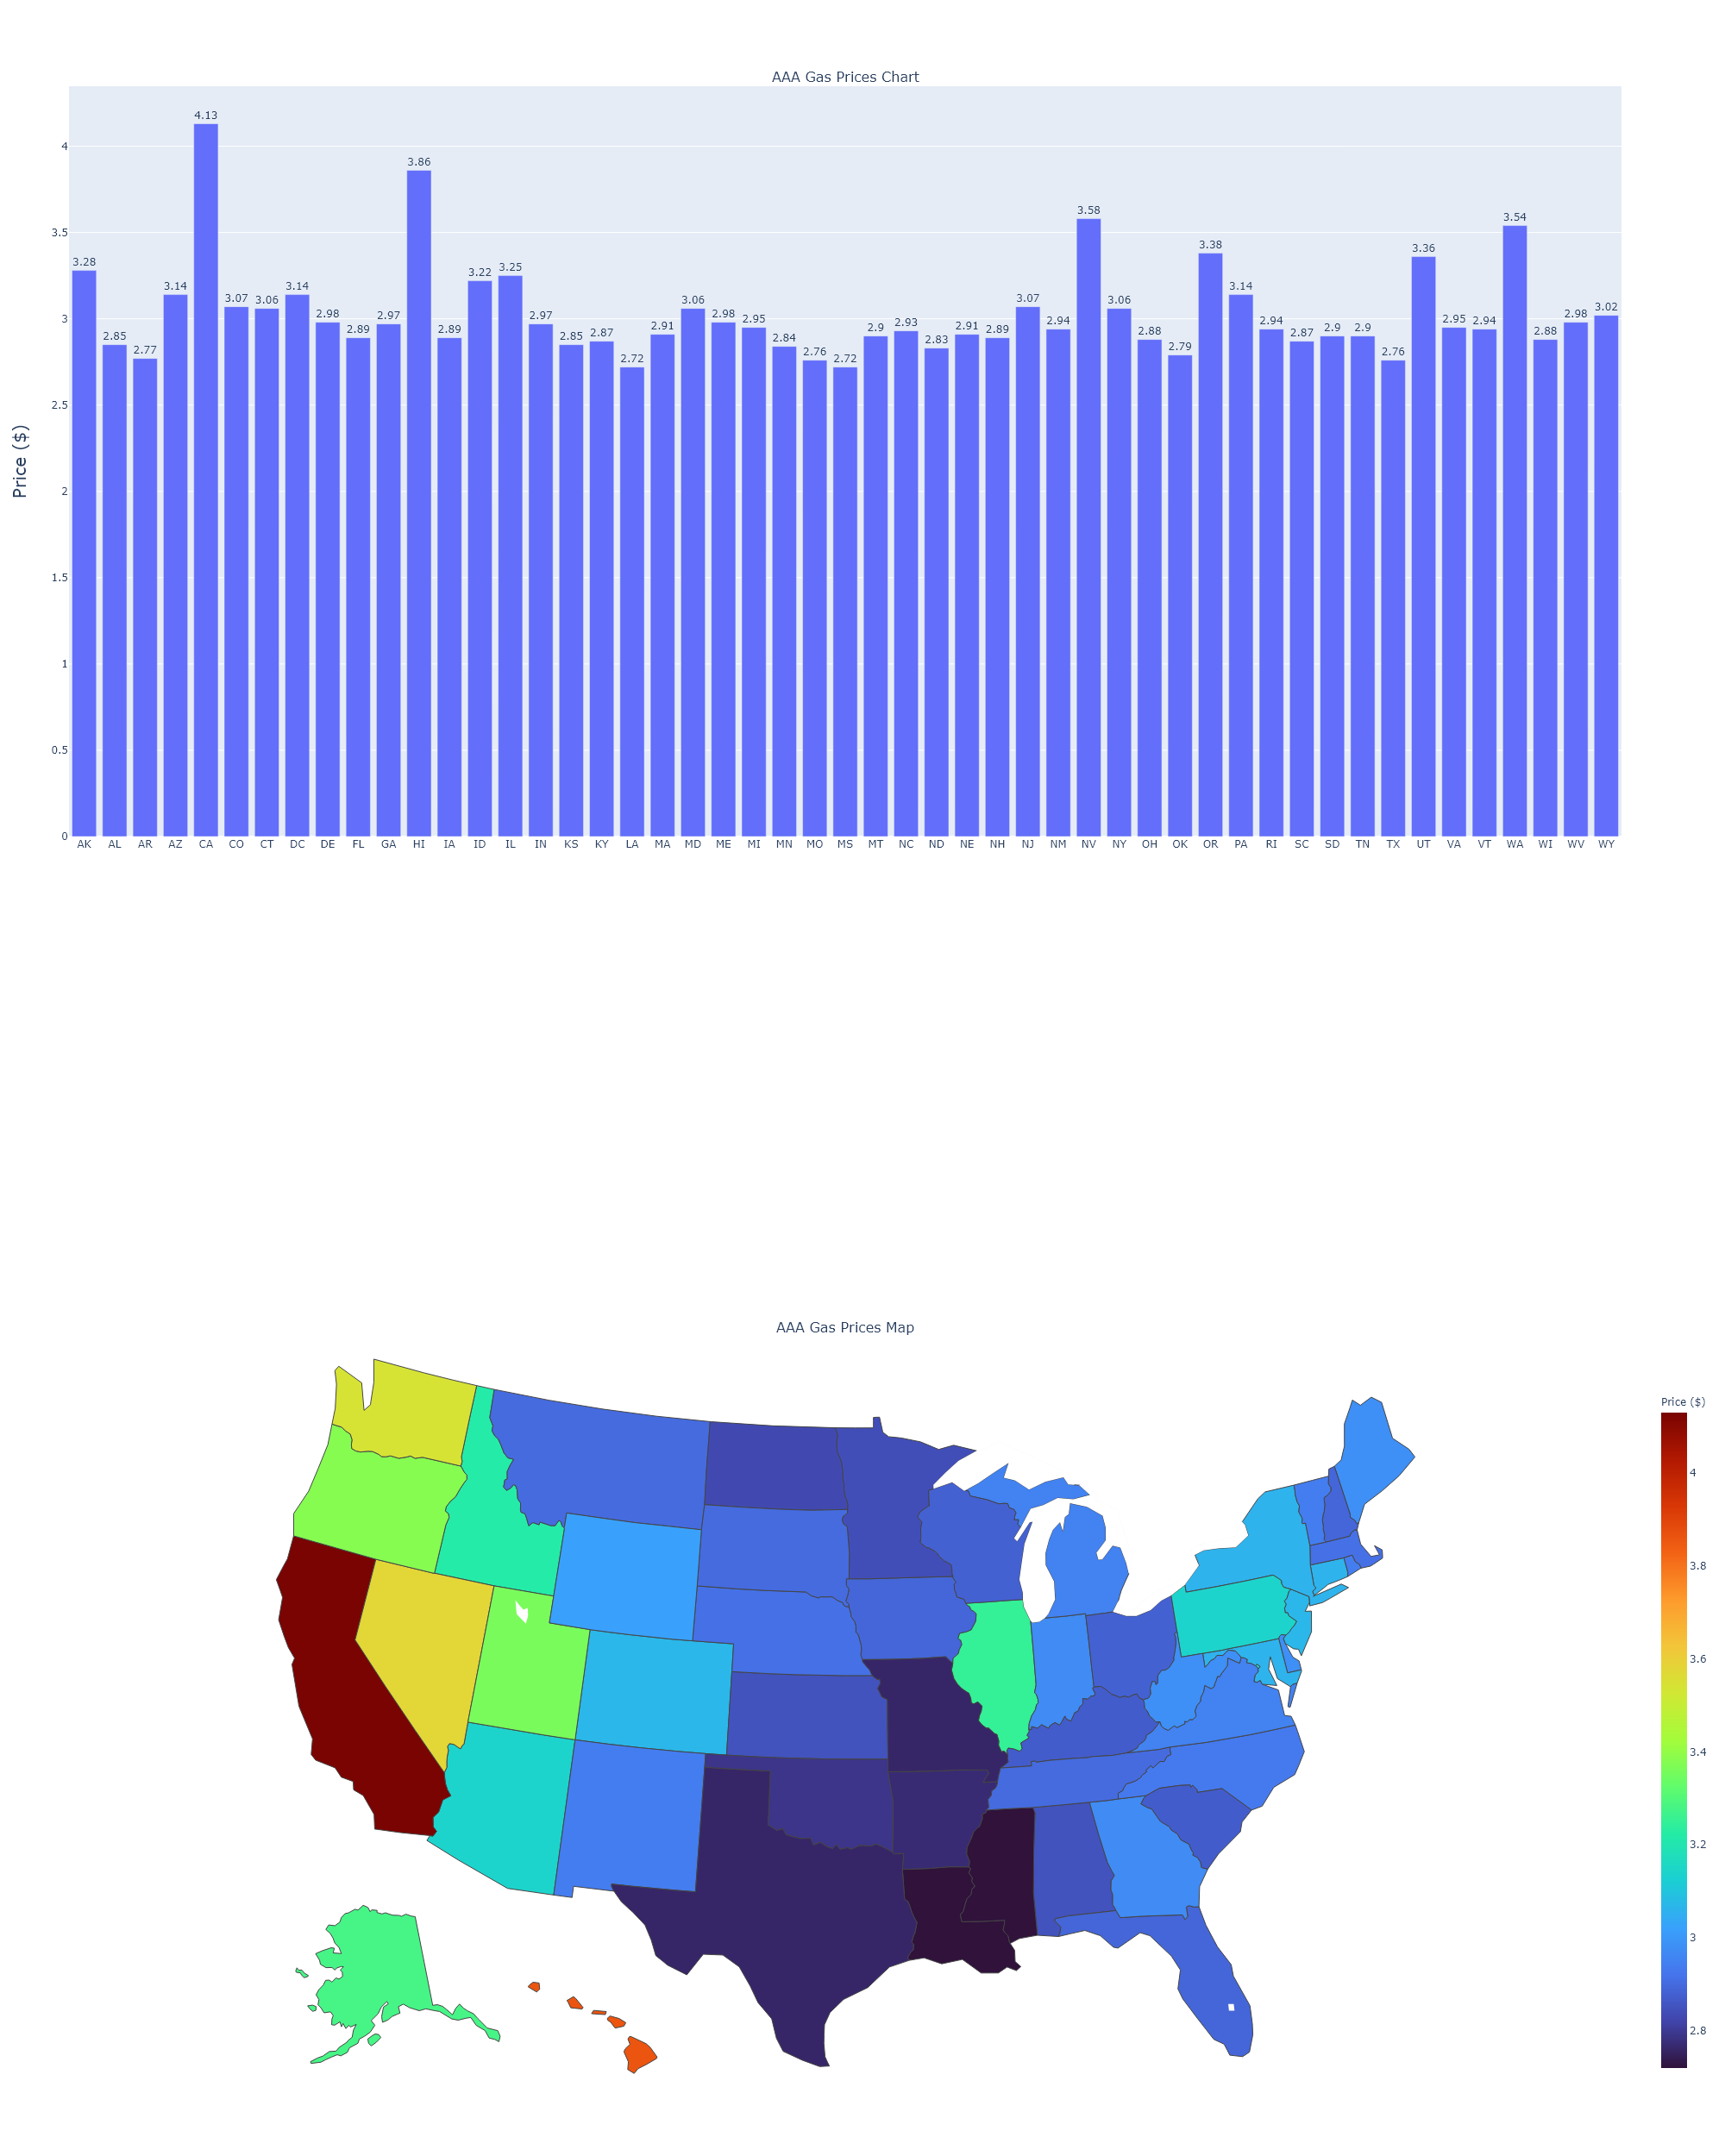

In [6]:
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{'type':'bar'}],
           [{'type':'choropleth'}]],
    subplot_titles=('AAA Gas Prices Chart', 'AAA Gas Prices Map'))

fig.add_trace(
    go.Bar(name='AAA Gas Prices by State',
           x=df['Abbreviation'],
           y=df['Regular'],
           text=df['Regular'],
           textposition='outside'),
    row=1, col=1)

fig.update_layout(xaxis_tickangle=0,
                  yaxis=dict(
                      title='Price ($)',
                      titlefont_size=20))

fig.add_trace(
    go.Choropleth(locations=df['Abbreviation'],
                  z=df['Regular'],
                  colorscale='turbo',
                  locationmode='USA-states',
                  colorbar=dict(
                      lenmode='pixels',
                      len=800,
                      yanchor='top',
                      y=0.35,
                      title='Price ($)')),
    row=2, col=1)

fig.update_layout(geo_scope='usa')

fig.show(renderer='png', height=2500, width=2000)